## import libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
pd.set_option("display.max_columns", 100)
import warnings
warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data = pd.read_csv("diamonds.csv")   ## Color of the diamond, with D being the best and J the worst
data.head()   ## Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal
# length in mm
# width in mm

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

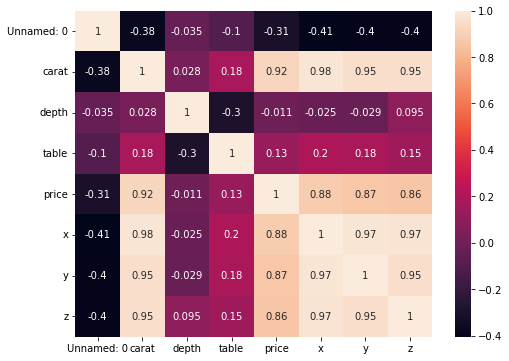

In [5]:
plt.figure(figsize = (8, 6))
sbn.heatmap(data.corr(), annot = True);

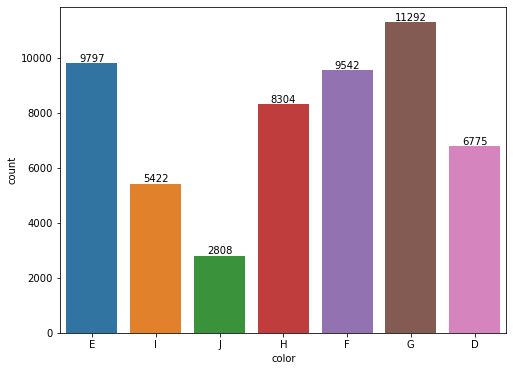

In [6]:
plt.figure(figsize = (8, 6))
ax = sbn.countplot(x = data["color"])
ax.bar_label(ax.containers[0]);

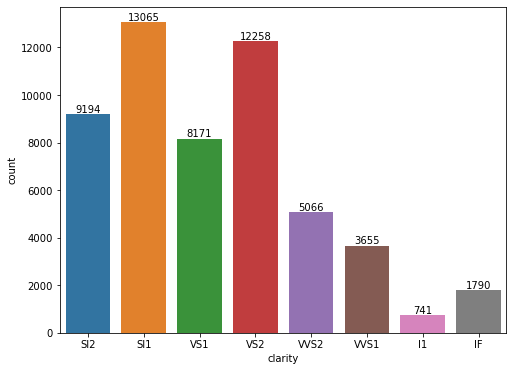

In [7]:
plt.figure(figsize = (8, 6))
ax = sbn.countplot(x = data["clarity"])
ax.bar_label(ax.containers[0]);

In [8]:
data['Size'] = data['x'] * data['y'] * data['z']

In [9]:
d = {"D" : 7, "E" : 6, "F" : 5, "G" : 4, "H" : 3, "I" : 2, "J" : 1}

In [10]:
data["color"] = data["color"].map(d)

In [11]:
data = data.drop(["clarity", 'Unnamed: 0', 'x', 'y', 'z'], axis = 1)

In [12]:
data.head()

,carat,cut,color,depth,table,price,Size
0,0.23,Ideal,6,61.5,55.0,326,38.202030
1,0.21,Premium,6,59.8,61.0,326,34.505856
2,0.23,Good,6,56.9,65.0,327,38.076885
3,0.29,Premium,2,62.4,58.0,334,46.724580
4,0.31,Good,1,63.3,58.0,335,51.917250


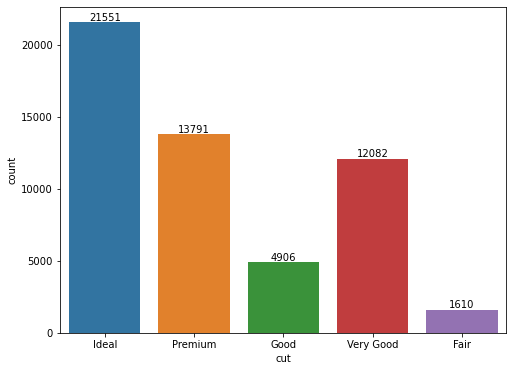

In [13]:
plt.figure(figsize = (8, 6))
bx = sbn.countplot(x = data["cut"])
bx.bar_label(bx.containers[0]);

In [14]:
d1 = {"Fair" : 1, "Good" : 2, "Very Good" : 3, "Premium" : 4, "Ideal" : 5}
data["cut"] = data["cut"].map(d1)

In [15]:
data.head()

,carat,cut,color,depth,table,price,Size
0,0.23,5,6,61.5,55.0,326,38.202030
1,0.21,4,6,59.8,61.0,326,34.505856
2,0.23,2,6,56.9,65.0,327,38.076885
3,0.29,4,2,62.4,58.0,334,46.724580
4,0.31,2,1,63.3,58.0,335,51.917250


## Cok fazla veri oldugu için ilk 1000 tanesini alıcaz derin öğrenmede de kullanabilelim diye

In [16]:
y = data["price"][:1000]
x = data.drop("price", axis = 1)[:1000]

In [17]:
x

,carat,cut,color,depth,table,Size
0,0.23,5,6,61.5,55.0,38.202030
1,0.21,4,6,59.8,61.0,34.505856
2,0.23,2,6,56.9,65.0,38.076885
3,0.29,4,2,62.4,58.0,46.724580
4,0.31,2,1,63.3,58.0,51.917250
...,...,...,...,...,...,...
995,0.54,5,7,61.4,52.0,92.264520
996,0.72,5,6,62.5,55.0,116.598342
997,0.72,2,5,59.4,61.0,119.293704
998,0.74,4,7,61.8,58.0,120.014846


In [18]:
def regression(x, y):
    lin = LinearRegression()
    rid = Ridge()
    las = Lasso()
    ela = ElasticNet()
    sup = SVR(kernel = "sigmoid")
    ran = RandomForestRegressor()
    dec = DecisionTreeRegressor()
    
    models = [lin, rid, las, ela, sup, ran, dec]
    model_names = ["Linear_R", "Ridge", "Lasso", "Elastic", "Support", "Random", "Decision_T"]
    
    x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)
    #x_train = MinMaxScaler().fit_transform(x_train)
    #x_test = MinMaxScaler().fit_transform(x_test)
    
    r2 = []
    
    result = pd.DataFrame(columns = ["r2_score"], index = model_names)
    
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        r2.append(r2_score(y_true, y_pred) * 100)
       
        
    result["r2_score"] = r2
   
        
    return result.sort_values("r2_score", ascending = False) 

In [19]:
regression(x, y)

,r2_score
Random,99.704340
Decision_T,99.396898
Elastic,79.842967
Lasso,79.819388
Ridge,79.809233
Linear_R,79.620398
Support,-13.729655


## Derin Öğrenme

In [26]:
x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.3, random_state = 42)
#x_train = MinMaxScaler().fit_transform(x_train)
#x_test = MinMaxScaler().fit_transform(x_test)

In [27]:
model = Sequential()
model.add(Dense(units = 124, activation = 'relu'))
#model.add(Dropout(0.4))
model.add(Dense(units = 256, activation = 'relu'))
#model.add(Dropout(0.4))
model.add(Dense(units = 512, activation = 'relu'))
#model.add(Dropout(0.4))
model.add(Dense(units = 124, activation = 'relu'))
#model.add(Dropout(0.4))
model.add(Dense(units = 30, activation = 'relu'))
model.add(Dense(units = 1, activation = 'linear'))

model.compile(loss = 'mse', metrics = 'MeanSquaredError', optimizer = 'adam')

In [29]:
early_stopping = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25)

In [30]:
history = model.fit(x_train, y_train, epochs = 200, validation_data = (x_test, y_true), callbacks = [early_stopping], verbose = 1)

Epoch 1/200
22/22 [==============================] - 1s 10ms/step - loss: 4108059.7500 - mean_squared_error: 4108059.7500 - val_loss: 1131239.3750 - val_mean_squared_error: 1131239.3750
Epoch 2/200
22/22 [==============================] - 0s 3ms/step - loss: 523823.9062 - mean_squared_error: 523823.9062 - val_loss: 235883.0469 - val_mean_squared_error: 235883.0469
Epoch 3/200
22/22 [==============================] - 0s 3ms/step - loss: 238429.4688 - mean_squared_error: 238429.4688 - val_loss: 170726.5469 - val_mean_squared_error: 170726.5469
Epoch 4/200
22/22 [==============================] - 0s 3ms/step - loss: 169639.6562 - mean_squared_error: 169639.6562 - val_loss: 140698.8594 - val_mean_squared_error: 140698.8594
Epoch 5/200
22/22 [==============================] - 0s 3ms/step - loss: 144255.9688 - mean_squared_error: 144255.9688 - val_loss: 120883.5703 - val_mean_squared_error: 120883.5703
Epoch 6/200
22/22 [==============================] - 0s 3ms/step - loss: 120958.0703 - mea

22/22 [==============================] - 0s 4ms/step - loss: 5436.5801 - mean_squared_error: 5436.5801 - val_loss: 7093.1709 - val_mean_squared_error: 7093.1709
Epoch 48/200
22/22 [==============================] - 0s 4ms/step - loss: 4794.3369 - mean_squared_error: 4794.3369 - val_loss: 6822.6992 - val_mean_squared_error: 6822.6992
Epoch 49/200
22/22 [==============================] - 0s 3ms/step - loss: 4478.2471 - mean_squared_error: 4478.2471 - val_loss: 5197.2466 - val_mean_squared_error: 5197.2466
Epoch 50/200
22/22 [==============================] - 0s 3ms/step - loss: 4320.3750 - mean_squared_error: 4320.3750 - val_loss: 5892.6069 - val_mean_squared_error: 5892.6069
Epoch 51/200
22/22 [==============================] - 0s 2ms/step - loss: 4150.1973 - mean_squared_error: 4150.1973 - val_loss: 6007.3076 - val_mean_squared_error: 6007.3076
Epoch 52/200
22/22 [==============================] - 0s 3ms/step - loss: 4167.5752 - mean_squared_error: 4167.5752 - val_loss: 4729.0952 - val

22/22 [==============================] - 0s 3ms/step - loss: 4006.5310 - mean_squared_error: 4006.5310 - val_loss: 5849.4702 - val_mean_squared_error: 5849.4702
Epoch 95/200
22/22 [==============================] - 0s 3ms/step - loss: 3854.0208 - mean_squared_error: 3854.0208 - val_loss: 5556.2061 - val_mean_squared_error: 5556.2061
Epoch 96/200
22/22 [==============================] - 0s 3ms/step - loss: 3822.0603 - mean_squared_error: 3822.0603 - val_loss: 4775.0894 - val_mean_squared_error: 4775.0894
Epoch 97/200
22/22 [==============================] - 0s 3ms/step - loss: 4049.1274 - mean_squared_error: 4049.1274 - val_loss: 4389.3457 - val_mean_squared_error: 4389.3457
Epoch 98/200
22/22 [==============================] - 0s 3ms/step - loss: 4435.9590 - mean_squared_error: 4435.9590 - val_loss: 8445.4863 - val_mean_squared_error: 8445.4863
Epoch 99/200
22/22 [==============================] - 0s 3ms/step - loss: 5765.9873 - mean_squared_error: 5765.9873 - val_loss: 4770.4507 - val

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 124)               868       
                                                                 
 dense_13 (Dense)            (None, 256)               32000     
                                                                 
 dense_14 (Dense)            (None, 512)               131584    
                                                                 
 dense_15 (Dense)            (None, 124)               63612     
                                                                 
 dense_16 (Dense)            (None, 30)                3750      
                                                                 
 dense_17 (Dense)            (None, 1)                 31        
                                                                 
Total params: 231,845
Trainable params: 231,845
Non-tr

In [32]:
tahmin = model.predict(x_test)
tahmin

10/10 [==============================] - 0s 1ms/step


array([[2830.5698 ],
       [ 500.1809 ],
       [ 527.8127 ],
       [2823.463  ],
       [ 503.35056],
       [2824.4888 ],
       [2770.0535 ],
       [2754.2957 ],
       [2789.339  ],
       [2810.794  ],
       [2817.861  ],
       [ 459.56012],
       [2829.5903 ],
       [2808.5737 ],
       [2709.1838 ],
       [2888.7131 ],
       [2865.5474 ],
       [2863.549  ],
       [2833.015  ],
       [2816.9543 ],
       [2828.2095 ],
       [2817.0571 ],
       [2772.729  ],
       [2874.3499 ],
       [2806.487  ],
       [2771.2407 ],
       [2712.6726 ],
       [2773.559  ],
       [2709.0264 ],
       [2791.294  ],
       [2821.571  ],
       [2790.4714 ],
       [2703.819  ],
       [2854.7341 ],
       [2783.664  ],
       [2819.6611 ],
       [2807.6362 ],
       [2812.6064 ],
       [2715.1177 ],
       [ 439.07144],
       [2829.4683 ],
       [2764.7087 ],
       [2848.5095 ],
       [2787.7686 ],
       [2853.71   ],
       [2836.694  ],
       [2766.616  ],
       [2839.

In [33]:
r2_score(y_true, tahmin)

0.9927955617653064

<AxesSubplot:>

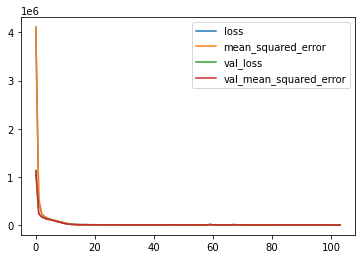

In [34]:
loss = pd.DataFrame(history.history)
loss.plot()

In [35]:
## LSTM
model2 = Sequential()
model2.add(LSTM(units=124, return_sequences = True, input_shape=(x_train.shape[1], 1)))
model2.add(LSTM(units=256, return_sequences = False))
model2.add(Dense(units=512, activation='relu'))
model2.add(Dense(units=124, activation='relu'))
model2.add(Dense(units=30, activation='relu'))
model2.add(Dense(units=1, activation='linear'))

model2.compile(loss='mse', metrics=['MeanSquaredError'], optimizer='adam')
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 124)            62496     
                                                                 
 lstm_1 (LSTM)               (None, 256)               390144    
                                                                 
 dense_18 (Dense)            (None, 512)               131584    
                                                                 
 dense_19 (Dense)            (None, 124)               63612     
                                                                 
 dense_20 (Dense)            (None, 30)                3750      
                                                                 
 dense_21 (Dense)            (None, 1)                 31        
                                                                 
Total params: 651,617
Trainable params: 651,617
Non-tr

In [36]:
history2 = model2.fit(x_train, y_train, epochs = 5, validation_data = (x_test, y_true), verbose = 1)

Epoch 1/5
22/22 [==============================] - 4s 47ms/step - loss: 6614008.5000 - mean_squared_error: 6614008.5000 - val_loss: 6031416.5000 - val_mean_squared_error: 6031416.5000
Epoch 2/5
22/22 [==============================] - 0s 14ms/step - loss: 4122563.7500 - mean_squared_error: 4122563.7500 - val_loss: 1490736.3750 - val_mean_squared_error: 1490736.3750
Epoch 3/5
22/22 [==============================] - 0s 14ms/step - loss: 944707.3125 - mean_squared_error: 944707.3125 - val_loss: 696002.1875 - val_mean_squared_error: 696002.1875
Epoch 4/5
22/22 [==============================] - 0s 15ms/step - loss: 734318.0000 - mean_squared_error: 734318.0000 - val_loss: 683685.0625 - val_mean_squared_error: 683685.0625
Epoch 5/5
22/22 [==============================] - 0s 16ms/step - loss: 714271.6875 - mean_squared_error: 714271.6875 - val_loss: 682399.4375 - val_mean_squared_error: 682399.4375


In [37]:
tahmin2 = model2.predict(x_test)

10/10 [==============================] - 1s 6ms/step


In [38]:
r2_score(y_true, tahmin2) * 100

-0.138414760605432

<AxesSubplot:>

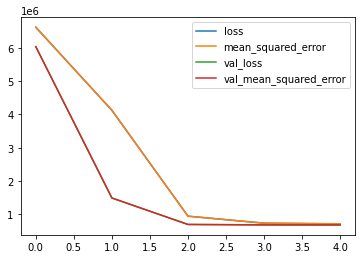

In [39]:
loss2 = pd.DataFrame(history2.history)
loss2.plot()